<a href="https://colab.research.google.com/github/SaraParvizi/Pathrise-Job-Placement-Prediction-/blob/main/pathrise_cleaned_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 📊 Pathrise Job Placement Prediction Project
#
# This data science project explores job placement outcomes for fellows in the Pathrise program,
# a company that helps candidates land jobs in tech.
#
# 🎯 Project Goals:
# 1. Predict whether a fellow will be placed in a job (Classification).
# 2. Estimate how long it takes for a fellow to get placed (Regression).
#
# ✅ Methods Used:
# - Data Cleaning and Preprocessing
# - Data Visualization and Feature Engineering
# - Machine Learning Models:
#     • Logistic Regression
#     • K-Nearest Neighbors (KNN)
#     • Decision Tree
#     • Random Forest (Best performing model)


In [2]:
from google.colab import files

In [3]:
# Upload the file from local storage
uploaded=files.upload()

Saving Data_Pathrise 2.xlsx to Data_Pathrise 2.xlsx


In [4]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For data visualization
import matplotlib.pyplot as plt  # For plotting graphs
from sklearn.model_selection import train_test_split  # For splitting data
from sklearn.linear_model import LinearRegression  # Machine learning model
from sklearn.metrics import median_absolute_error  # Evaluation metrics

In [5]:
import pickle  # For saving and loading machine learning models or objects

In [6]:
df = pd.read_excel('Data_Pathrise 2.xlsx')  # Load the dataset from an Excel file into a Pandas DataFrame

In [7]:
#Data Understanding

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2544 entries, 0 to 2543
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           2544 non-null   int64  
 1   pathrise_status              2544 non-null   object 
 2   primary_track                2544 non-null   object 
 3   cohort_tag                   2536 non-null   object 
 4   program_duration_days        1928 non-null   float64
 5   placed                       2544 non-null   int64  
 6   employment_status            2315 non-null   object 
 7   highest_level_of_education   2486 non-null   object 
 8   length_of_job_search         2470 non-null   object 
 9   biggest_challenge_in_search  2520 non-null   object 
 10  professional_experience      2322 non-null   object 
 11  work_authorization_status    2260 non-null   object 
 12  number_of_interviews         2326 non-null   float64
 13  number_of_applicat

In [9]:
df.shape # Get the number of rows and columns

(2544, 16)

In [10]:
df.describe()  # Get statistical summary of numerical columns

,id,program_duration_days,placed,number_of_interviews,number_of_applications
count,2544.000000,1928.000000,2544.000000,2326.000000,2544.000000
mean,1272.500000,136.098548,0.375786,2.182287,36.500786
std,734.533866,125.860248,0.484420,2.959273,53.654896
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,636.750000,14.000000,0.000000,0.000000,9.000000
50%,1272.500000,112.000000,0.000000,1.000000,20.000000
75%,1908.250000,224.000000,1.000000,3.000000,45.000000
max,2544.000000,548.000000,1.000000,20.000000,1000.000000


In [11]:
df.head()# Show the first five rows of the dataset

,id,pathrise_status,primary_track,cohort_tag,program_duration_days,placed,employment_status,highest_level_of_education,length_of_job_search,biggest_challenge_in_search,professional_experience,work_authorization_status,number_of_interviews,number_of_applications,gender,race
0,1,Active,SWE,OCT19A,NaN,0,Unemployed,Bachelor's Degree,3-5 months,Hearing back on my applications,3-4 years,Canada Citizen,2.0,900,Male,Non-Hispanic White or Euro-American
1,2,Active,PSO,JAN20A,NaN,0,Unemployed,"Some College, No Degree",3-5 months,Getting past final round interviews,1-2 years,Citizen,6.0,0,Male,Non-Hispanic White or Euro-American
2,3,Closed Lost,Design,AUG19B,0.0,0,Employed Part-Time,Master's Degree,Less than one month,Figuring out which jobs to apply for,Less than one year,Citizen,0.0,0,Male,East Asian or Asian American
3,4,Closed Lost,PSO,AUG19B,0.0,0,Contractor,Bachelor's Degree,Less than one month,Getting past final round interviews,Less than one year,Citizen,5.0,25,Male,Decline to Self Identify
4,5,Placed,SWE,AUG19A,89.0,1,Unemployed,Bachelor's Degree,1-2 months,Hearing back on my applications,1-2 years,F1 Visa/OPT,10.0,100,Male,East Asian or Asian American


In [12]:
#Data cleaning

In [13]:
#cleaning and categorizing the 'Pathrise_status' column.
def organizer(status):
    status_lower = status.lower()
    if status_lower == 'placed' or status_lower == 'withdrawn (failed)' or status_lower == 'active':
        return status
    else:
        return 'other'


In [14]:

# Apply the 'organizer' function to clean and standardize the 'pathrise_status' column
df['pathrise_status']=df['pathrise_status'].apply(organizer)

In [15]:
df['pathrise_status']

,pathrise_status
0,Active
1,Active
2,other
3,other
4,Placed
...,...
2539,Withdrawn (Failed)
2540,Withdrawn (Failed)
2541,Active
2542,Active


In [16]:
# Remove unrelated columns to keep only relevant data
df=df.drop(columns=['id','cohort_tag','length_of_job_search','number_of_interviews','number_of_applications'])

In [17]:
# Count the number of duplicate rows in the DataFrame
df.duplicated().sum()

np.int64(8)

In [18]:
# Remove duplicate rows and modify the DataFrame in place
df.drop_duplicates(inplace=True)

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df['program_duration_days'].isnull().sum()

np.int64(610)

In [21]:
 # Remove rows where 'program_duration_days' is null
df = df[~df['program_duration_days'].isnull()]

In [22]:
df['gender'].value_counts()

,count
gender,
Male,1132
Female,410
Decline to Self Identify,10
Non-Binary,3


In [23]:
# Count the number of missing (null) values in the 'gender' column
df['gender'].isnull().sum()

np.int64(371)

In [24]:
# Remove rows with missing (null) values
df=df[~df['gender'].isnull()]

In [25]:
# Count the number of missing (null) values in the 'work_authorization_status column
df['work_authorization_status'].isnull().sum()

np.int64(170)

In [26]:
# Remove rows with missing (null) values in the 'work_authorization_status' column
df=df[~df['work_authorization_status'].isnull()]

In [27]:
# Count the number of missing (null) values in the race  column
df['race'].isnull().sum()

np.int64(9)

In [28]:
# Remove rows with missing (null) values
df=df[~df['race'].isnull()]

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 2 to 2543
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1376 non-null   object 
 1   primary_track                1376 non-null   object 
 2   program_duration_days        1376 non-null   float64
 3   placed                       1376 non-null   int64  
 4   employment_status            1258 non-null   object 
 5   highest_level_of_education   1345 non-null   object 
 6   biggest_challenge_in_search  1363 non-null   object 
 7   professional_experience      1269 non-null   object 
 8   work_authorization_status    1376 non-null   object 
 9   gender                       1376 non-null   object 
 10  race                         1376 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 129.0+ KB


In [30]:
df['biggest_challenge_in_search'].isnull().sum()

np.int64(13)

In [31]:
df['biggest_challenge_in_search'].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown'

<ipython-input-31-028a56d50e48>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['biggest_challenge_in_search'].fillna('Unknown', inplace=True)  # Fill missing values with 'Unknown'


In [32]:
df['highest_level_of_education'].isnull().sum()

np.int64(31)

In [33]:
  # Fill with the most frequent value
df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0], inplace=True)

<ipython-input-33-567a2868eb48>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['highest_level_of_education'].fillna(df['highest_level_of_education'].mode()[0], inplace=True)


In [34]:
df['pathrise_status'].isnull().sum()

np.int64(0)

In [35]:
df['professional_experience'].isnull().sum()

np.int64(107)

In [36]:
df['professional_experience'].fillna(df['professional_experience'].mode()[0], inplace=True)  # Fill with the most frequent value

<ipython-input-36-5b1522ecc076>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['professional_experience'].fillna(df['professional_experience'].mode()[0], inplace=True)  # Fill with the most frequent value


In [37]:
df['placed'].isnull().sum()

np.int64(0)

In [38]:
df['primary_track'].isnull().sum()

np.int64(0)

In [39]:
df['biggest_challenge_in_search'].isnull().sum()

np.int64(0)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1376 entries, 2 to 2543
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   pathrise_status              1376 non-null   object 
 1   primary_track                1376 non-null   object 
 2   program_duration_days        1376 non-null   float64
 3   placed                       1376 non-null   int64  
 4   employment_status            1258 non-null   object 
 5   highest_level_of_education   1376 non-null   object 
 6   biggest_challenge_in_search  1376 non-null   object 
 7   professional_experience      1376 non-null   object 
 8   work_authorization_status    1376 non-null   object 
 9   gender                       1376 non-null   object 
 10  race                         1376 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 129.0+ KB


In [41]:
df['employment_status ']

,employment_status
2,Employed Part-Time
3,Contractor
4,Unemployed
5,Employed Full-Time
6,Employed Full-Time
...,...
2534,Employed Full-Time
2538,Employed Part-Time
2539,Contractor
2540,NaN


In [42]:
df['employment_status '].value_counts()

,count
employment_status,
Student,409
Unemployed,353
Employed Full-Time,245
Employed Part-Time,151
Contractor,100


In [43]:
df['employment_status '].fillna('Student', inplace=True)

In [44]:
df.isnull().sum().sum()

np.int64(0)

In [45]:
df['employment_status '].isnull().sum()

np.int64(0)

In [46]:
#Data Visualization

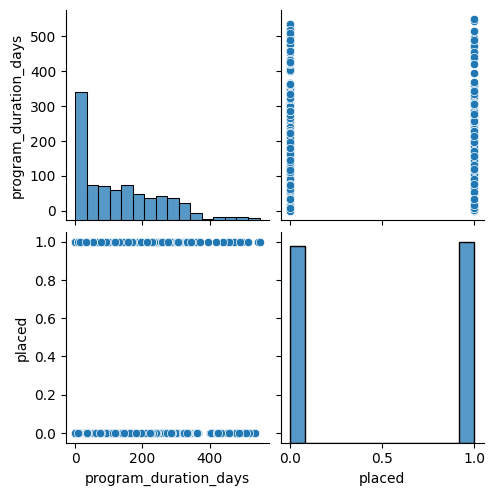

In [47]:
sns.pairplot(df) #it shows just integer columns

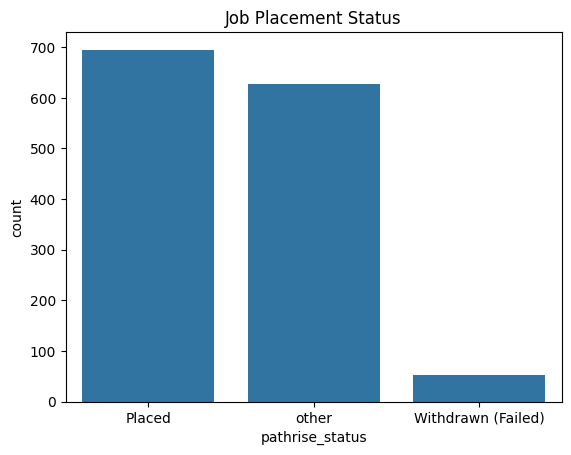

In [48]:
#To see how many candidates were placed or not placed:
sns.countplot(x='pathrise_status', data=df, order=df['pathrise_status'].value_counts().index)
plt.title("Job Placement Status")
plt.show()

<ipython-input-49-d66f230b394f>:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Placement Status", fontsize=12)


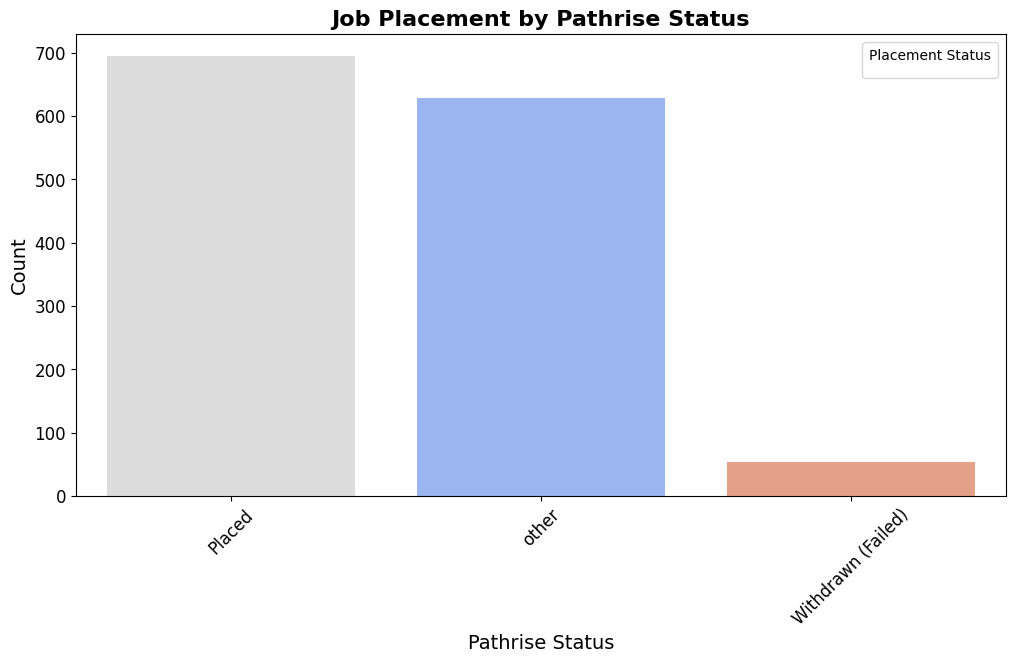

In [49]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pathrise_status', hue='pathrise_status', data=df, palette="coolwarm", order=df['pathrise_status'].value_counts().index)

plt.title("Job Placement by Pathrise Status", fontsize=16, fontweight='bold')
plt.xlabel("Pathrise Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

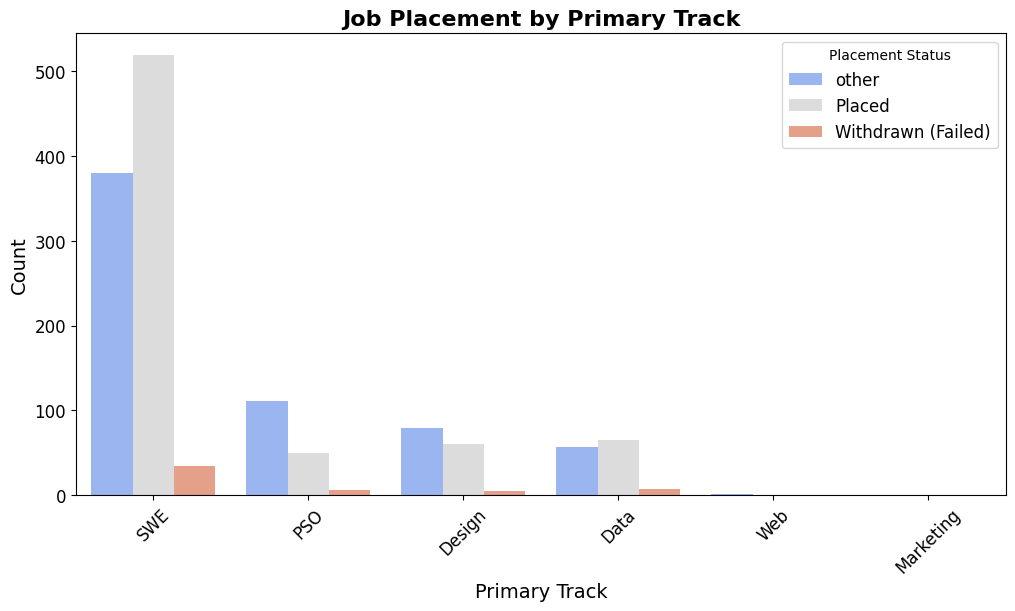

In [50]:
#Job placement by primary track
plt.figure(figsize=(12, 6))
sns.countplot(x='primary_track', hue='pathrise_status', data=df, palette="coolwarm", order=df['primary_track'].value_counts().index)

plt.title("Job Placement by Primary Track", fontsize=16, fontweight='bold')
plt.xlabel("Primary Track", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

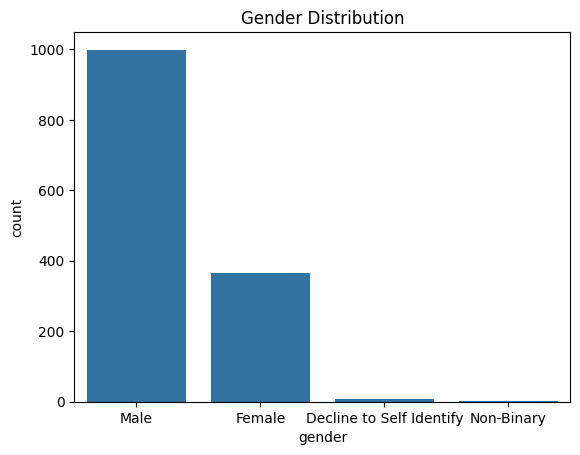

In [51]:
#to see the distribution of 'gender':
sns.countplot(x=df['gender'])
plt.title("Gender Distribution")
plt.show()

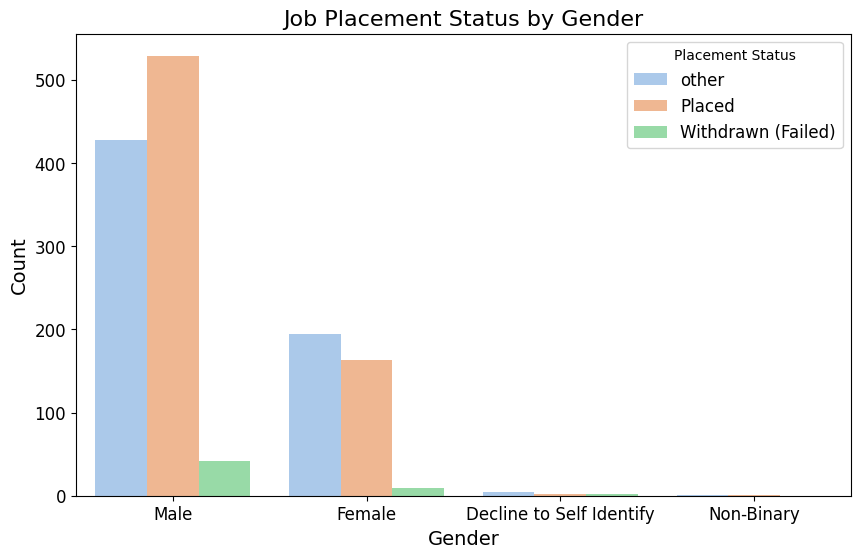

In [52]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='pathrise_status', data=df, palette="pastel")

plt.title("Job Placement Status by Gender", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

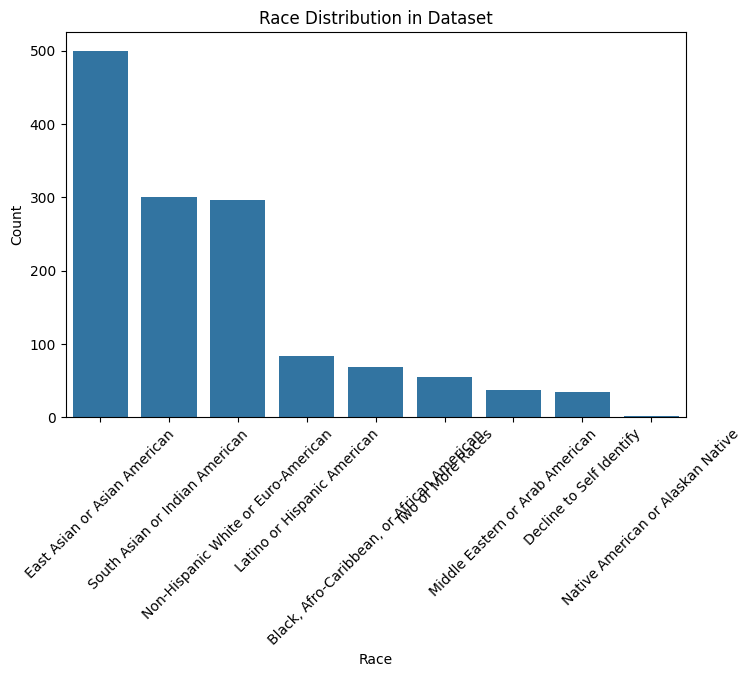

In [53]:
#Race distribusion in Dataset
plt.figure(figsize=(8, 5))
sns.countplot(x='race', data=df, order=df['race'].value_counts().index)
plt.title("Race Distribution in Dataset")
plt.xticks(rotation=45)
plt.xlabel("Race")
plt.ylabel("Count")
plt.show()

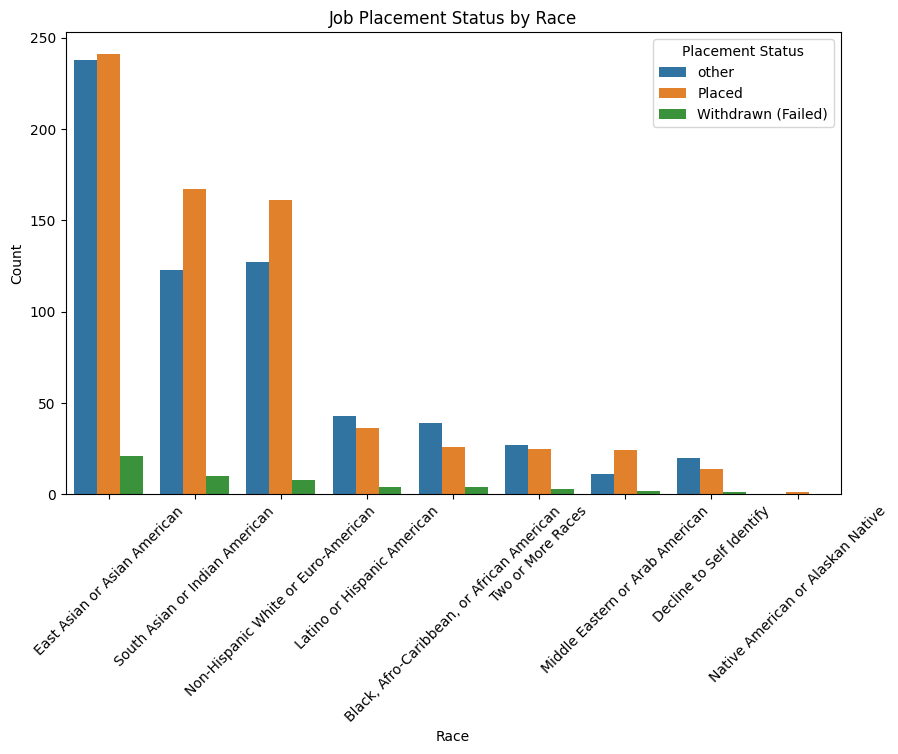

In [54]:
#Job placement by Race:
plt.figure(figsize=(10, 6))
sns.countplot(x='race', hue='pathrise_status', data=df, order=df['race'].value_counts().index)
plt.title("Job Placement Status by Race")
plt.xticks(rotation=45)
plt.xlabel("Race")
plt.ylabel("Count")
plt.legend(title="Placement Status")
plt.show()

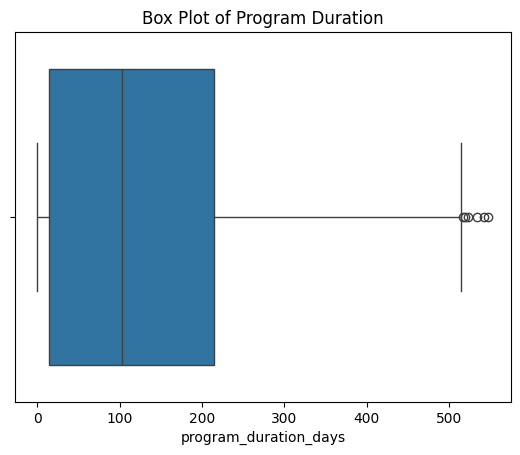

In [55]:
#To check for outliers in a column(program_duration_days):
sns.boxplot(x=df['program_duration_days'])
plt.title("Box Plot of Program Duration")
plt.show()

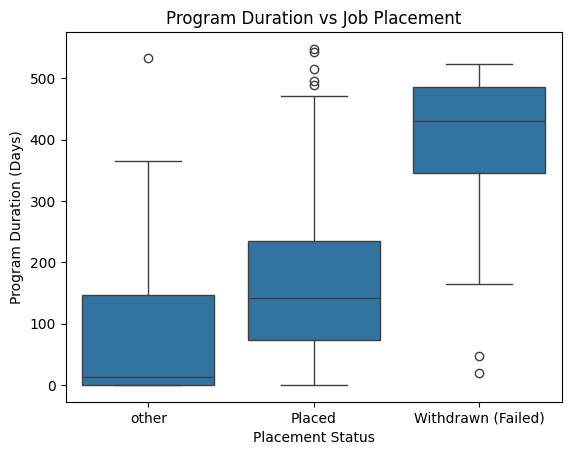

In [56]:
sns.boxplot(x='pathrise_status', y='program_duration_days', data=df)
plt.title("Program Duration vs Job Placement")
plt.xlabel("Placement Status")
plt.ylabel("Program Duration (Days)")
plt.show()

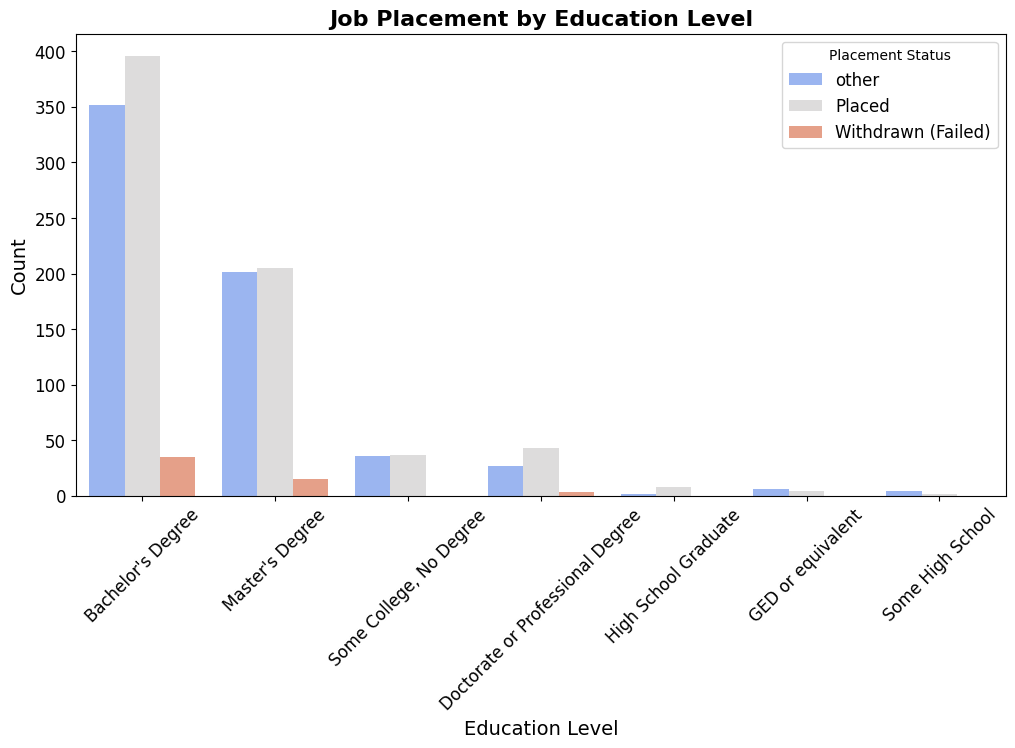

In [57]:
#Job Placement by Education Level
plt.figure(figsize=(12, 6))
sns.countplot(x='highest_level_of_education', hue='pathrise_status', data=df, palette="coolwarm", order=df['highest_level_of_education'].value_counts().index)

plt.title("Job Placement by Education Level", fontsize=16, fontweight='bold')
plt.xlabel("Education Level", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

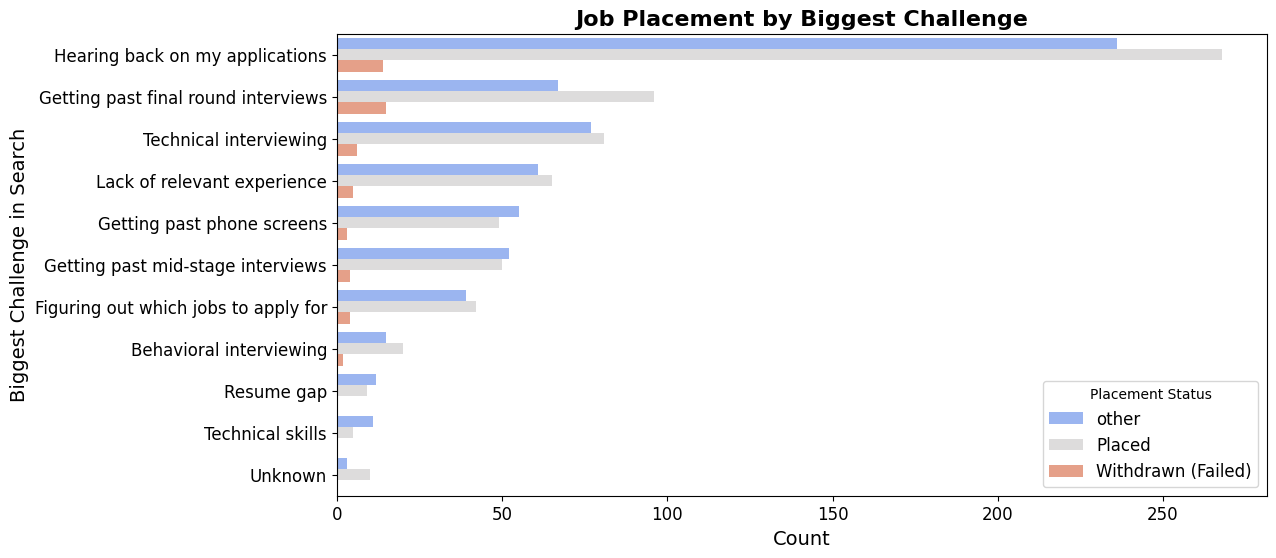

In [58]:
#Job Placement by Biggest Challenge
plt.figure(figsize=(12, 6))
sns.countplot(y='biggest_challenge_in_search', hue='pathrise_status', data=df, palette="coolwarm", order=df['biggest_challenge_in_search'].value_counts().index)

plt.title("Job Placement by Biggest Challenge", fontsize=16, fontweight='bold')
plt.xlabel("Count", fontsize=14)
plt.ylabel("Biggest Challenge in Search", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

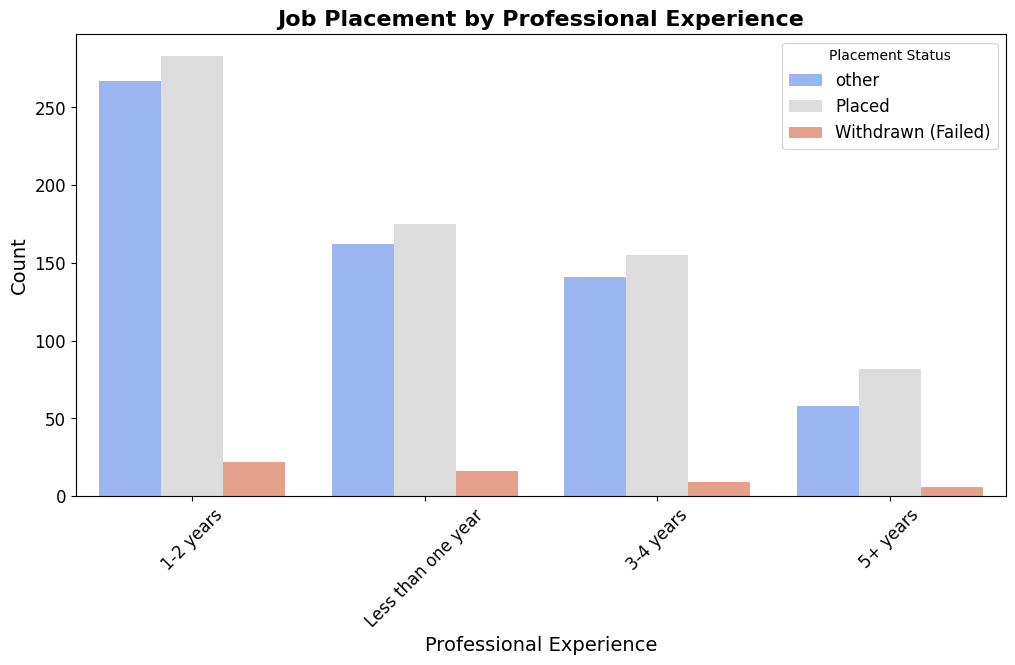

In [59]:
#Job Placement by Professional Experience
plt.figure(figsize=(12, 6))
sns.countplot(x='professional_experience', hue='pathrise_status', data=df, palette="coolwarm", order=df['professional_experience'].value_counts().index)

plt.title("Job Placement by Professional Experience", fontsize=16, fontweight='bold')
plt.xlabel("Professional Experience", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

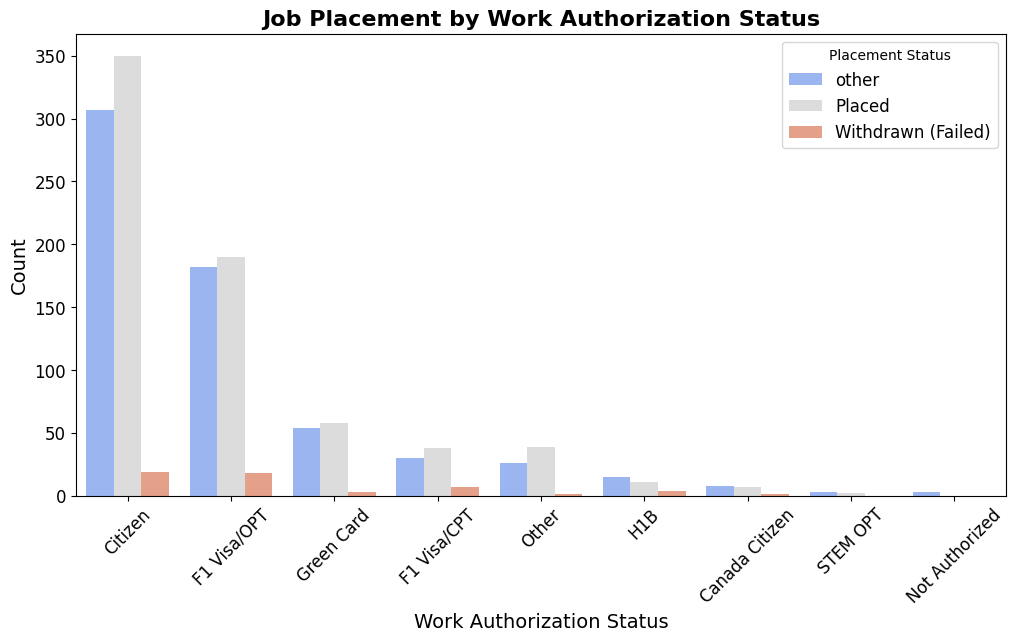

In [60]:
#Job Placement by Work Authorization Status
plt.figure(figsize=(12, 6))
sns.countplot(x='work_authorization_status', hue='pathrise_status', data=df, palette="coolwarm", order=df['work_authorization_status'].value_counts().index)

plt.title("Job Placement by Work Authorization Status", fontsize=16, fontweight='bold')
plt.xlabel("Work Authorization Status", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Placement Status", fontsize=12)
plt.show()

In [61]:
# Convert program_duration_days from float to int
df['program_duration_days'] = df['program_duration_days'].astype(int)

In [62]:
print(df.columns)

Index(['pathrise_status', 'primary_track', 'program_duration_days', 'placed',
       'employment_status ', 'highest_level_of_education',
       'biggest_challenge_in_search', 'professional_experience',
       'work_authorization_status', 'gender', 'race'],
      dtype='object')


In [63]:
# Convert categorical columns into dummy variables (one-hot encoding) to prepare for machine learning
# 'drop_first=True' ensures we avoid the dummy variable trap by dropping the first category in each column
df = pd.get_dummies(df, columns=['pathrise_status', 'primary_track', 'employment_status ',
                                 'highest_level_of_education', 'biggest_challenge_in_search',
                                 'professional_experience', 'work_authorization_status', 'gender', 'race'],
                     drop_first=True)


In [64]:
df = df.astype(int)

In [65]:
df.head()

,program_duration_days,placed,pathrise_status_Withdrawn (Failed),pathrise_status_other,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Employed Full-Time,...,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
2,0,0,0,1,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
3,0,0,0,1,0,0,1,0,0,0,...,1,0,1,0,0,0,0,0,0,0
4,89,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
5,0,0,0,1,0,0,0,1,0,1,...,1,0,0,1,0,0,0,0,0,0
6,0,0,0,1,0,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0


In [66]:
#MAchine Learning
X = df.drop(columns=['placed'])  # Features (everything except 'placed')
y= df['placed']  # Target variable

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)#training (80%) and testing (20%) data


In [68]:
X_train #X_train: Training dataset containing features used to predict job placement outcomes.

,program_duration_days,pathrise_status_Withdrawn (Failed),pathrise_status_other,primary_track_Design,primary_track_Marketing,primary_track_PSO,primary_track_SWE,primary_track_Web,employment_status _Employed Full-Time,employment_status _Employed Part-Time,...,gender_Male,gender_Non-Binary,race_Decline to Self Identify,race_East Asian or Asian American,race_Latino or Hispanic American,race_Middle Eastern or Arab American,race_Native American or Alaskan Native,race_Non-Hispanic White or Euro-American,race_South Asian or Indian American,race_Two or More Races
1898,422,1,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2050,155,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1276,0,0,1,0,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
184,53,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1572,272,0,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1613,162,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
115,282,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
898,332,0,0,0,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2505,5,0,1,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


In [69]:
 y_train #y_train: Target variable for training, indicating whether a candidate was placed (1) or not (0).

,placed
1898,0
2050,1
1276,0
184,1
1572,0
...,...
1613,1
115,0
898,1
2505,0


In [70]:
y_test #y_test: Target variable for testing, used to evaluate the model's job placement predictions.

,placed
962,0
2365,0
1596,0
836,0
203,1
...,...
202,1
2388,0
1123,0
300,1


In [71]:
y_train #y_train: Target variable for training, representing whether a candidate was placed (1) or not (0).

,placed
1898,0
2050,1
1276,0
184,1
1572,0
...,...
1613,1
115,0
898,1
2505,0


In [72]:
#LogisticRegression
# Import Libraries
from sklearn.linear_model import LogisticRegression

In [73]:
# Initialize the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=101)

# Fit the model with training data
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=101)

In [74]:
# Predict job placement for the test data
y_pred_lr = lr_model.predict(X_test)

In [75]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the Logistic Regression model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 1.0
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       131
           1       1.00      1.00      1.00       145

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [81]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [82]:
# Convert categorical features to numeric using one-hot encoding
X = pd.get_dummies(df.drop(columns=['placed']), drop_first=True)  # Convert categories
y = df['placed']  # Target variable (1 = placed, 0 = not placed)

In [83]:
# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [84]:
# Scale the data (KNN is distance-based, so scaling is necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [85]:
# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=10)

In [86]:
# Predict and evaluate the model
y_pred_knn = knn.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred_knn)

In [87]:
print("KNN Accuracy:", accuracy)

KNN Accuracy: 0.8731884057971014


In [88]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.88      0.87       137
           1       0.88      0.86      0.87       139

    accuracy                           0.87       276
   macro avg       0.87      0.87      0.87       276
weighted avg       0.87      0.87      0.87       276



In [89]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


In [90]:
# Initialize and train the decision tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=42)

In [91]:
# Predict on the test set
y_pred_dtree = dtree.predict(X_test_scaled)


In [92]:
# Evaluate performance
dtree_accuracy = accuracy_score(y_test, y_pred_dtree)
print("🔸 Decision Tree Accuracy:", dtree_accuracy)
print("🔸 Classification Report:\n", classification_report(y_test, y_pred_dtree))


🔸 Decision Tree Accuracy: 1.0
🔸 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       139

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [93]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [94]:
# Initialize and train
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [95]:
# Predict
y_pred_rf = rf.predict(X_test_scaled)


In [96]:
# Evaluate
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print("🌲 Random Forest Accuracy:", rf_accuracy)
print("🌲 Classification Report:\n", classification_report(y_test, y_pred_rf))

🌲 Random Forest Accuracy: 1.0
🌲 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       137
           1       1.00      1.00      1.00       139

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276



In [97]:
# Model Comparison and Final Choice

# After training and evaluating multiple models — Logistic Regression, K-Nearest Neighbors (KNN), Decision Tree, and Random Forest —
# we compared their performance based on accuracy and classification metrics.

# 1-Logistic Regression is simple and interpretable, but may not capture complex patterns in the data.
# 2- KNN is intuitive but sensitive to feature scaling and doesn't perform well with high-dimensional data.
# 3- Decision Tree gives interpretable rules but tends to overfit on the training data without regularization.
# 4- Random Forest showed the highest accuracy and balanced precision/recall, thanks to its ensemble nature,
#     reducing overfitting and handling both categorical and numerical data effectively.

# 🔸 Therefore, **Random Forest** is the best model for this project. It is robust, accurate, and works well
#     with the cleaned Pathrise dataset to predict job placement outcomes.

In [98]:
#(Goal 2)
#2. Estimate how long it takes for a fellow to get placed (Regression).

In [99]:
# 🎯 Regression Target: How long does it take to get a job?
X_reg = df.drop(columns=['program_duration_days'])
y_reg = df['program_duration_days']

In [103]:
#Train-test split
from sklearn.model_selection import train_test_split

X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

In [104]:
#Train a regression model (e.g., Random Forest Regressor)
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train_reg, y_train_reg)

RandomForestRegressor(random_state=42)

In [107]:
#Make predictions and evaluate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_reg = regressor.predict(X_test_reg)

print("MAE:", mean_absolute_error(y_test_reg, y_pred_reg))


MAE: 100.05024821454712


In [108]:
print("MSE:", mean_squared_error(y_test_reg, y_pred_reg))

MSE: 14911.91381455296


In [110]:
# Evaluation
# Calculate and print the Mean Absolute Error (MAE) to evaluate how close the model's predictions are to the actual values on average
print("\n🌲 Random Forest Regression Results")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf))


🌲 Random Forest Regression Results
MAE: 100.05024821454712


In [111]:
df.to_csv('pathrise_cleaned_data.csv', index=False)

In [112]:
# Project Completed
print("✅ Pathrise Data Science Project Completed Successfully!")

✅ Pathrise Data Science Project Completed Successfully!


In [113]:
## ✅ Project Complete!
#This concludes the analysis of job placement predictions using Pathrise data.
#We built and evaluated several machine learning models to answer:
#1. **Will a candidate get placed in a job?** → [Best model: Random Forest]
#2. **How long does it take to get placed?** → [Using program_duration_days]

#Thanks for reviewing this project!